# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
### Data Dictionary

1. PatientId: identification of a patient 
2. AppointmentID: identification of each appointment  
3. Gender: Male or Female.  
    * *Female is the greater proportion, woman takes way more care of they health in comparison to man.*
4. ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
5. AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
6. Age: How old is the patient.
7. Neighbourhood: where the appointment takes place.  
8. Scholarship: True of False.  
    * *indicates whether or not the patient is enrolled in Brasilian welfare program, consider reading this article [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)*
9. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: True or False  

### Question(s) for Analysis
> **Research Question 1 :** What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment ? 
> **Research Question 2 :** What is the most common disease among people scheduled for appointment ?  
> **Research Question 3 :** Are females susceptible to disease than males ?   
> **Research Question 4 :** Are handicapped patients have more chance for enrollement in Brasilian welfare program ?

<a id='wrangling'></a>
## Data Wrangling

In [242]:
# Set up import statements for all of the packages planned to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

In [243]:
# Load appointment dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Properties

In [244]:
#size of the dataset
print('Size of the appointment dataset: ',df.shape)

Size of the appointment dataset:  (110527, 14)


In [245]:
#datatypes of columns and general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>From above dataset information the following points have been noted:  
1- No missing values so no need to drop null values  
2- Need to convert datatypes of some colums like AppointmentDay and ScheduledDay


In [246]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From initial dataset exporling, the following points noted:  
1- 37 is the avarage age for patients who schedule appointment and 25% of patients is 18 years old  
2- There are unvalid ages like -1 ,so we need to drop this columns  
3- 75% from patients have received SMS for their appointments


### Data Cleaning
 

#### (1) Check For Duplicates
> check if there are duplicates in dataset and drop if exist

In [247]:
#check for duplicates
duplicates = df.duplicated().sum()
# print number of duplicates in appointments dataset
print(duplicates)

0


#### (2) No Duplicates exist so, Check For Unique Values
> as second step for data cleaning, we check for unique values on all columns in dataset to decide which column will be involved on our analysis and which we can neglect
 

In [248]:
# iterating the columns of dataframe
for col in df.columns:
    print(col,': ',df[col].unique(),'\n')



PatientId :  [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13] 

AppointmentID :  [5642903 5642503 5642549 ... 5630692 5630323 5629448] 

Gender :  ['F' 'M'] 

ScheduledDay :  ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z'] 

AppointmentDay :  ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016

#### (3) Drop Columns
> Drop columns PatientId, AppointmentID and Neighbourhood which will not be considered in analysis

In [249]:
# PatientId, AppointmentID columns not revelant to our questions.
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

# confirm changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


#### (4) Rename Columns 
> Rename **No-show** column to **Show** and maps its values to 0\1

In [250]:
# rename No-show to Show
df.rename(columns={'No-show': 'Show'}, inplace=True)
# confirm changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [251]:
#after renaming 'No-show' column to 'Show'
#map Yes/No to 0/1
df['Show'] = df['Show'].map({"Yes": 0, "No": 1})
df['Handcap'] = df['Handcap'].map({0: "No Handicap", 1:"Low", 2:"Mid",3:"High",4:"Sever"})
# confirm changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,No Handicap,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,No Handicap,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,No Handicap,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,No Handicap,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,No Handicap,0,1


#### (5) Converting Datatype  
>Convert datatype to boolen for Disease columns, Scholarship, SMS_received and Show  
>Convert datatype of ScheduledDay and AppointmentDay to datetime

In [252]:
# iterating the columns of dataframe
for col in df[['Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'SMS_received','Show']]:
    df[col] = df[col].astype('bool')
    
for col in df[['ScheduledDay', 'AppointmentDay']]:
    df[col] = pd.to_datetime(df[col])
              
#confrim changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Scholarship     110527 non-null  bool               
 5   Hipertension    110527 non-null  bool               
 6   Diabetes        110527 non-null  bool               
 7   Alcoholism      110527 non-null  bool               
 8   Handcap         110527 non-null  object             
 9   SMS_received    110527 non-null  bool               
 10  Show            110527 non-null  bool               
dtypes: bool(6), datetime64[ns, UTC](2), int64(1), object(2)
memory usage: 4.8+ MB


#### (6) Drop rows with invalid Age like 0, -1

In [253]:
# Filter all rows for which the patient's
# age is less than or equal to zero
df_age_filtered = df[df['Age'] <= 0]
 
# Print the shape of the dataframe
print(df_age_filtered.shape)

(3540, 11)


In [254]:
# delete all rows with 'Age' has value less than or equal 0
indexAge = df[df['Age'] <= 0].index
df.drop(indexAge , inplace=True)

#confirm changes
print(df[df['Age'] <= 0].shape)


(0, 11)


#### (6) Add New Columns  
>According to **Data Dictionary** the description for  
>- ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.  
>- AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.  
>So we will do the following:  
1- Create App_DayOfWeek column from AppointmentDay  
2- Create WaitingDays column which has the time difference in days between AppointmantDay and ScheduledDay  

In [296]:
# extract day from the AppointmentDay column and create App_DayOfWeek column
df['App_DayOfWeek'] = df['AppointmentDay'].dt.day_name()
#calculate the time difference in hours between AppointmantDay and ScheduledDay  
df['WaitingDays'] = (df.AppointmentDay - df.ScheduledDay).apply(lambda x: int(divmod(x.total_seconds() , 86400)[0]))

#confirm changes
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,App_DayOfWeek,WaitingDays
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,False,True,False,False,No Handicap,False,True,Friday,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,False,False,False,False,No Handicap,False,True,Friday,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,False,False,False,False,No Handicap,False,True,Friday,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,False,False,False,False,No Handicap,False,True,Friday,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,False,True,True,False,No Handicap,False,True,Friday,-1


>3- After creating **WaitingDays** columns and explore some rows, there are invalid values like -1. thats mean that **AppointmentDay** has some dates less than **ScheduledDay** and this illogical.    
So all rows that have invalid WaitingDays need to mapped to zero  

In [256]:
# Fill all rows which have WaitingDays < 0 with zero
df['WaitingDays'].mask(df['WaitingDays'] < 0, 0, inplace=True)

#confirm changes
print('Waiting days with invalid values',df[df['WaitingDays'] < 0].shape)

df.head()

Waiting days with invalid values (0, 13)


,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,App_DayOfWeek,WaitingDays
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,False,True,False,False,No Handicap,False,True,Friday,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,False,False,False,False,No Handicap,False,True,Friday,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,False,False,False,False,No Handicap,False,True,Friday,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,False,False,False,False,No Handicap,False,True,Friday,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,False,True,True,False,No Handicap,False,True,Friday,0


<a id='eda'></a>
## Exploratory Data Analysis  


### Research Question 1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?    
> To find an answer to this question we need to answer the following questions:    
> 1- Do all patients who show up already received SMS?  
> 2- Is the enrollement in Brasilian welfare program associated with showing up to the appointment?  
> 3- Is there is day of week preferred for patients to show up the appointment?  
> 4- Are handicapped patients have difficulties to show up the appointment?  
> 5- Is the long waiting time prevent patients from showing up?    
> 6- Is most of the old patients in age who are showing up the appointment?

#### The percentage of patients who showed up the appointment and who didn't showed up.

In [257]:
def pie_plot(colname):
    df[colname].map({False:"not show up",True:"show up"}).value_counts().plot.pie(figsize=(4,4), autopct='%1.1f%%', fontsize = 10);
    plt.title("Percentage of patients who show up the appointment \n", fontsize = 12);
    plt.legend();

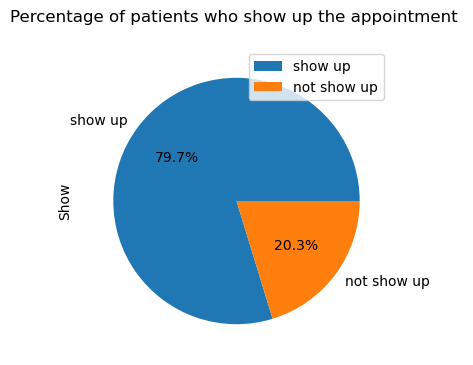

In [258]:
pie_plot('Show')

> From the above pie chart :   
>- There are 79.7% from the patients showed up to their appointments  
>- 20.3% didn't show up their appointments  
>So by answering the following questions we will be able to know the characteristic of patients who showed up and who didin't showed up

In [260]:
# function to draw bar chart for show column
def visualize(col_name,diagram_title,x_label,y_label,plot_type = None):
    # create show_up and not_show_up mask to be used in all questions related to research Q1
    show_up = df.Show == True
    not_show_up = df.Show == False
    
    if plot_type=='bar':
        df[col_name][show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='show up')
        df[col_name][not_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='not show up')     
    else:
        df[col_name][show_up].hist( alpha=0.5, label='show up')
        df[col_name][not_show_up].hist( alpha=0.7,  label='not show up')
        
        
    plt.legend();
    plt.ylabel(y_label);
    plt.xlabel(x_label);
    plt.title(diagram_title)

#### Q1-1: Do all patients who show up already received SMS?

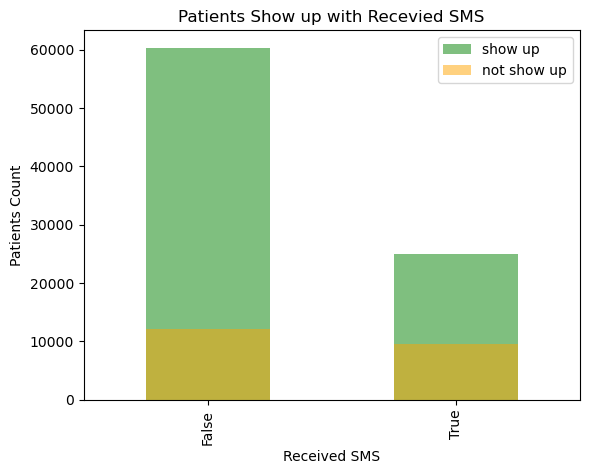

In [261]:
visualize(col_name='SMS_received',diagram_title='Patients Show up with Recevied SMS',x_label='Received SMS',y_label='Patients Count',plot_type='bar')

#### Q1-2 : Is the enrollement in Brasilian welfare program associated with showing up to the appointment?

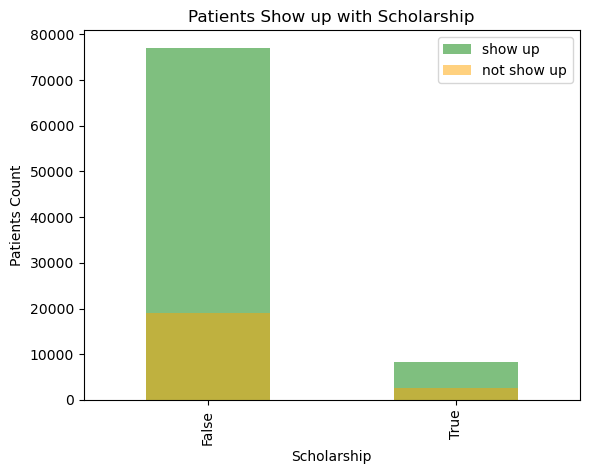

In [262]:
# the correlation between patients who show up and Scholarship
visualize(col_name='Scholarship',diagram_title='Patients Show up with Scholarship',x_label='Scholarship',y_label='Patients Count',plot_type='bar')

#### Q1 - 3 : Is there is day of week preferred for patients to show up the appointment ?

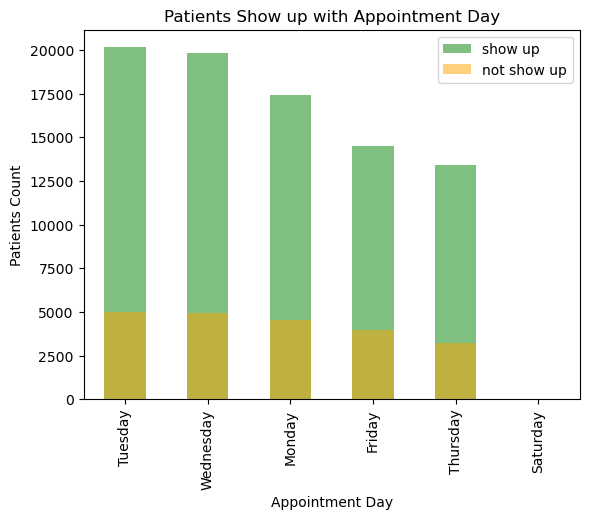

In [263]:
visualize(col_name='App_DayOfWeek',diagram_title='Patients Show up with Appointment Day',x_label='Appointment Day',y_label='Patients Count',plot_type='bar')

#### Q1 - 4 : Are handicapped patients have difficulties to show up the appointment?

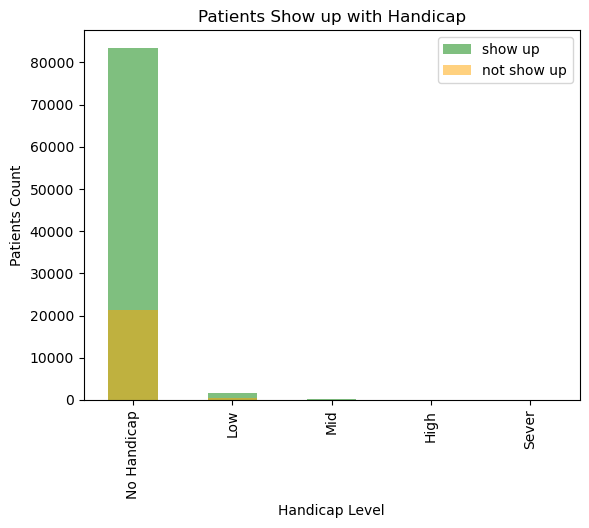

In [264]:
visualize(col_name='Handcap',diagram_title='Patients Show up with Handicap',x_label='Handicap Level',y_label='Patients Count',plot_type='bar')

#### Q1 - 5 : Is the long waiting time prevent patients from showing up?

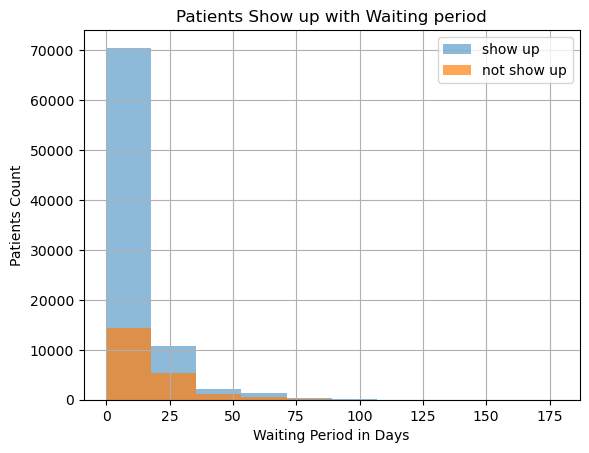

In [265]:
visualize('WaitingDays','Patients Show up with Waiting period','Waiting Period in Days','Patients Count')

#### Q1 - 6 : Is most of the old patients in age who are showing up the appointment?

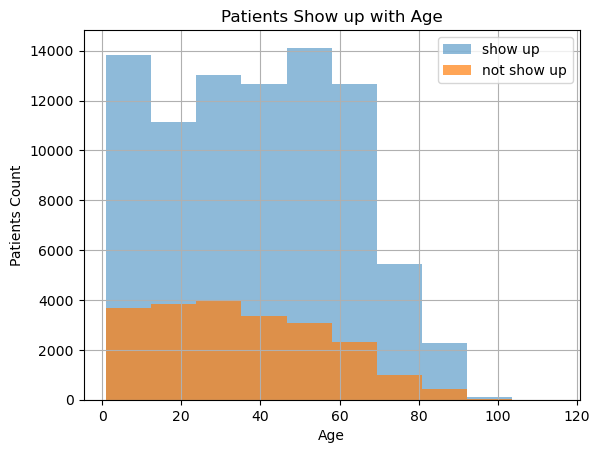

In [266]:
visualize('Age','Patients Show up with Age','Age','Patients Count')

### Research Question 2  : What is the most common disease among people scheduled for appointment ?

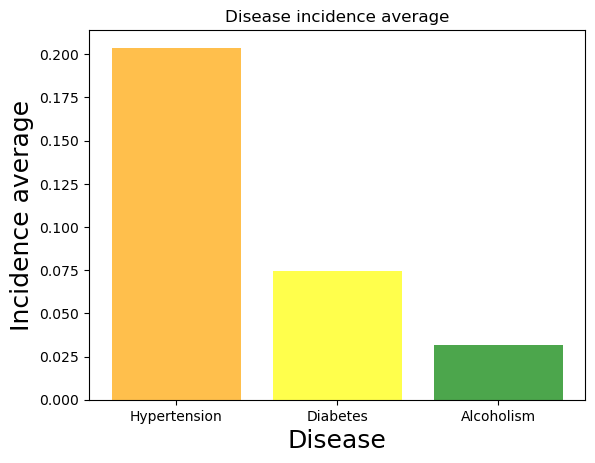

In [267]:
hyper_avg = df.Hipertension.mean()
diabetes_avg = df.Diabetes.mean()
alcoholism_avg = df.Alcoholism.mean()

colors = ['orange', 'yellow', 'green']
locations = [1, 2, 3]
heights = [hyper_avg, diabetes_avg, alcoholism_avg]
labels = ['Hypertension', 'Diabetes', 'Alcoholism']

plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title('Disease incidence average')
plt.xlabel('Disease', fontsize=18)
plt.ylabel('Incidence average', fontsize=18)
plt.xticks(locations, labels);

### Research Question 3 : Are females susceptible to disease than males?

In [270]:
def gender_disease_visulaize(col_name,diagram_title):
    # create gender mask to be used in all questions related to research Q4
    female = df.Gender == 'F'
    male = df.Gender == 'M'
    
    df[col_name][female].map({False:"No",True:"Yes"}).value_counts().plot(kind='bar',alpha=0.5,color='pink' , label='Female')
    df[col_name][male].map({False:"No",True:"Yes"}).value_counts().plot(kind='bar',alpha=0.5,color='blue', label='Male')
   
    
    plt.legend();
    plt.ylabel('Patients Count');
    plt.xlabel(col_name);
    plt.title(diagram_title)

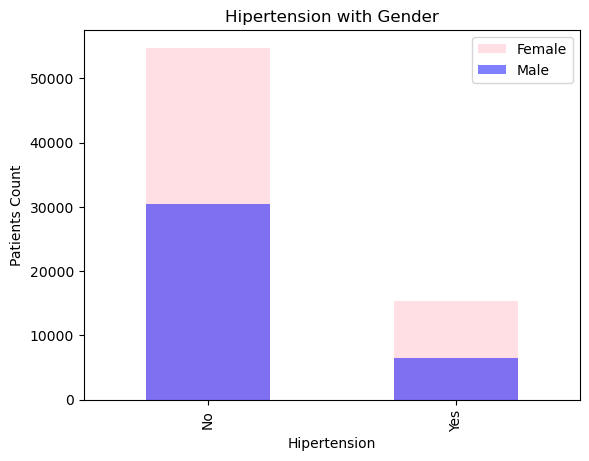

In [271]:
gender_disease_visulaize('Hipertension','Hipertension with Gender')

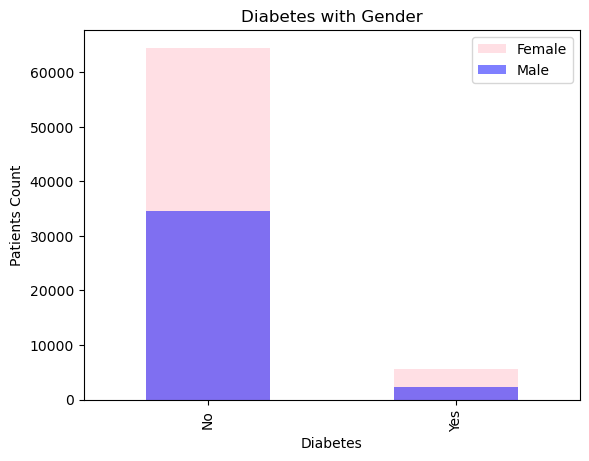

In [272]:
gender_disease_visulaize('Diabetes','Diabetes with Gender')

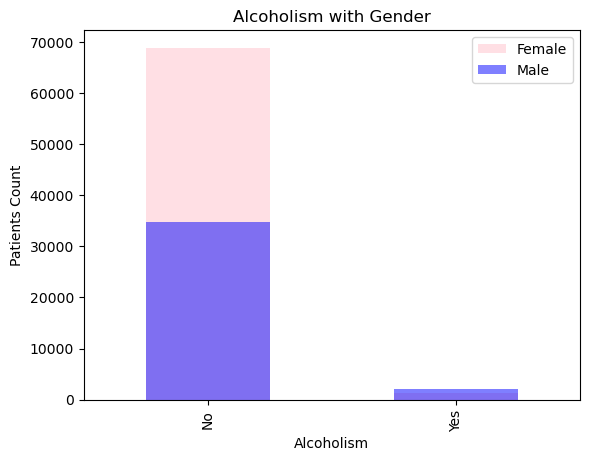

In [273]:
gender_disease_visulaize('Alcoholism','Alcoholism with Gender')

### Research Question 4  : Are handicapped patients have more chance for enrollement in Brasilian welfare program?

In [292]:
def visualize_scholarship(col_name,x_label,y_label,diagram_title):
    #define scholarship mask
    has_scholarship = df.Scholarship == True
    no_scholarship = df.Scholarship == False

    df[col_name][has_scholarship].value_counts().plot(kind='bar',alpha=0.5, color= 'yellow', label='scholarship')
    df[col_name][no_scholarship].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='no scholarship')     

    plt.legend();
    plt.ylabel(y_label);
    plt.xlabel(x_label);
    plt.title(diagram_title)



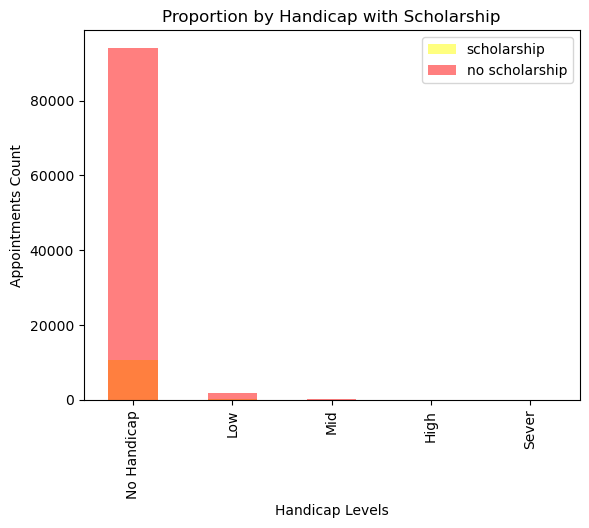

In [293]:
visualize_scholarship('Handcap','Handicap Levels', 'Appointments Count','Proportion by Handicap with Scholarship')

In [308]:
df['Month23r2'] = df['AppointmentDay'].dt.year
df.head()
print(df['Month23r2'].unique())

[2016]


<a id='conclusions'></a>
## Conclusions
 
>**Research Question 1** : What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?   

> **Do all patients who show up already received SMS?**  
>   1- For patients missing their appointments, we have 12112 didn't receive SMS and 9568 received  
>   2- For patients not missing thier appointments, we have **60290** didn't receive SMS and 25017 received  
>   So most of patients who already showed up their appointments didn't receive SMS  

> **Is the enrollement in Brasilian welfare program associated with showing up to the appointment?**  
>   1- For patients missing their appointments, we have 19109 not enrolled in Brasilian welfare program and 2571 enrolled  
>   2- For patients not missing their appointments, we have **77069** not enrolled in Brasilian welfare program and 8238 enrolled 
>   So most of patients who already showed up their appointments not enrolled in Brasilian welfare program

> **Is there is day of week preferred for patients to show up the appointment?**  
>   Yes, Tuesday and Wensday are the perferred days for patients 

> **Are handicapped patients have difficulties to show up the appointment?**    
>   No, the count of handicapped patients who showed up their appointments greater than who missed their appointments
Low    1675
Mid    146
High   10
Sever  2

> **Is the long waiting time prevent patients from showing up?**     
>   Yes, Patients who waitted time less than 25 days and showed up to their appointments greater than who missed their appointments

> **Is only the old patients in age who are showing up the appointment?**  
>   No, their are also younger patients showed up their appointments as old patients but the percentage of patients whose age less than 65 showed up their appointments than other patients

>So the factors to predict if a patient will show up for their scheduled appointment?
 Age range from 1 - 65 
 Day of the week: Wensday and Tuesday
 Waiting period less than 25 day

> **Research Question 2** : What is the most common disease among people scheduled for appointment ?  
    Hipertension

>**Research Question 3** : Are females susceptible to disease than males?
   Yes, Females susceptible to Hipertension and Diabetes but Males more susceptible to Alcoholism

>**Research Question 4** : Are handicapped patients have more chance for enrollement in Brasilian welfare program?
   No, handicapped patients have less chance for enrollement in Brasilian welfare program

#### Limitations :  
>1- The dataset does not contain sufficient data for the whole year - only three months are available for appointment
 2- No information available regarding the appointment location which is could affect the show rate

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])